# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Get the data

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,Unnamed: 0,Age,EstimatedSalary,Target
0,40,-1.017692,-1.548776,0
1,240,0.415005,2.327385,1
2,196,-0.731153,0.271845,0
3,294,-0.253587,-0.374182,0
4,306,1.274623,1.886912,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 4 columns):
Unnamed: 0         280 non-null int64
Age                280 non-null float64
EstimatedSalary    280 non-null float64
Target             280 non-null int64
dtypes: float64(2), int64(2)
memory usage: 8.8 KB


In [6]:
train.describe()

,Unnamed: 0,Age,EstimatedSalary,Target
count,280.000000,280.000000,280.000000,280.000000
mean,204.128571,0.027835,0.042065,0.360714
std,115.769103,0.975894,1.021531,0.481068
min,0.000000,-1.877311,-1.607506,0.000000
25%,103.750000,-0.731153,-0.733901,0.000000
50%,208.500000,-0.062561,0.022244,0.000000
75%,302.500000,0.797057,0.543470,1.000000
max,399.000000,2.134241,2.356750,1.000000


### Exploratory Analysis

create a histogram of Age

Text(0.5,0,'Age')

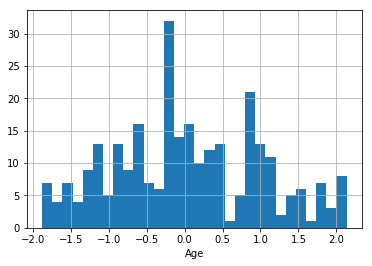

In [11]:
train['Age'].hist(bins=30)
plt.xlabel('Age')

create a jointplot of Age and Target

C:\Users\ADMIN\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


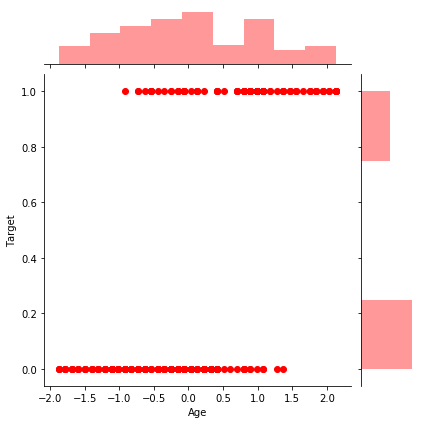

In [8]:
sns.jointplot(x='Age', y='Target', data=train, color='Red')

create a jointplot of Estimated salary and Target

C:\Users\ADMIN\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


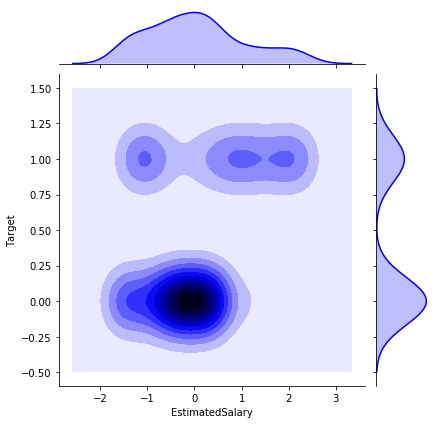

In [13]:
sns.jointplot(x='EstimatedSalary', y='Target', kind='kde', data=train, color='blue')

Finally create a pairplot 

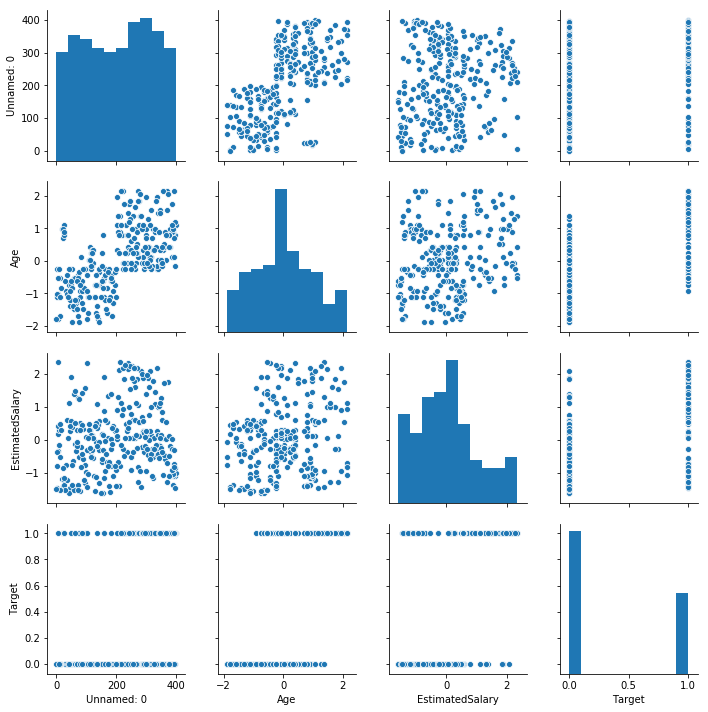

In [14]:
sns.pairplot(data=train)

### check the correlation

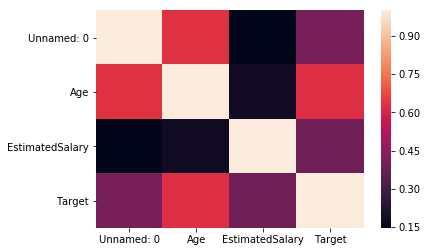

In [15]:
sns.heatmap(train.corr())

In [17]:
train.drop('Unnamed: 0', axis=1, inplace=True)

In [18]:
train.head(2)

,Age,EstimatedSalary,Target
0,-1.017692,-1.548776,0
1,0.415005,2.327385,1


### Standardize the variables

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [23]:
scaler.fit(train.drop('Target', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [25]:
scaled_features = scaler.transform(train.drop('Target', axis=1))

In [26]:
X = pd.DataFrame(scaled_features, columns=['Age','EstimatedSalary'])

In [27]:
Y = train['Target']

In [28]:
type(X)

pandas.core.frame.DataFrame

In [29]:
type(Y)

pandas.core.series.Series

In [30]:
X.shape

(280, 2)

In [31]:
Y.shape

(280,)


# Train Test Split

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

# Using SVM

In [34]:
from sklearn.svm import SVC

In [35]:
model = SVC()

In [36]:
model.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# Predictions

In [37]:
prediction = model.predict(x_test)

# Evaluations

create a confusion matrix

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
print(confusion_matrix(y_test, prediction))

[[50  2]
 [ 0 32]]


In [40]:
from sklearn.metrics import classification_report

In [41]:
print(classification_report(y_test, prediction))

             precision    recall  f1-score   support

          0       1.00      0.96      0.98        52
          1       0.94      1.00      0.97        32

avg / total       0.98      0.98      0.98        84

